# Pre Process

In [1]:
#Wine DF

import pandas as pd
import numpy as np
# Load red wine data
red_df = pd.read_csv('winequality-red.csv', sep=';')

# Load white wine data
white_df = pd.read_csv('winequality-white.csv', sep=';')

# Add a new column to each to mark the wine type
red_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

# Combine red and white DataFrames
D2 = pd.concat([red_df, white_df], ignore_index=True)

# Apply one-hot encoding to 'wine_type' WITHOUT dropping the first category
D2 = pd.get_dummies(D2, columns=['wine_type'])

D2['wine_type_red'] = D2['wine_type_red'].astype(int)
D2 ['wine_type_white'] = D2['wine_type_white'].astype(int)

D2.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type_red',
       'wine_type_white'],
      dtype='object')

In [2]:
import pandas as pd
import numpy as np

#Movies dataframe

# Load the u.data file into a DataFrame
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
D1 = pd.read_csv('u.data', sep='\t', names=column_names, encoding='latin-1')

# Show the first few rows to verify
print(D1.head())


   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


In [3]:
def check_df(df):
    print("=== Checking DataFrame ===")
    
    # Check for nulls
    nulls = df.isnull().sum()
    print("\nNull values per column:")
    print(nulls[nulls > 0] if nulls.sum() > 0 else "No nulls found")
    
    # Check for sparse data (defined here as >90% same value)
    print("\nChecking for sparse columns (>=90% same value):")
    for col in df.columns:
        top_freq = df[col].value_counts(normalize=True).max()
        if top_freq >= 0.9:
            print(f"Column '{col}' is sparse (top value frequency: {top_freq:.2f})")
    
    # Check if all columns are numeric
    non_numeric = df.select_dtypes(exclude=[np.number]).columns
    if len(non_numeric) > 0:
        print("\nNon-numeric columns detected:")
        print(non_numeric)
    else:
        print("\nAll columns are numeric")


In [4]:
#movies DATAFRAME

users_df = pd.read_csv(
    'u.user',
    sep='|',
    names=['user_id', 'age', 'gender', 'occupation', 'zip_code'],
    encoding='latin-1'
)
movie_columns = [
    'item_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
    'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy',
    'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
    'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]

movies_df = pd.read_csv(
    'u.item',
    sep='|',
    names=movie_columns,
    encoding='latin-1',
    usecols=range(24)  # restrict to relevant columns
)

# Merge ratings with user information
D1_user = pd.merge(D1, users_df, on='user_id')

# Merge the above with movie information
full_df = pd.merge(D1_user, movies_df, on='item_id')
full_df.head()

,user_id,item_id,rating,timestamp,age,gender,occupation,zip_code,title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


In [5]:
full_df['zip_code'].head()

0    55105
1    94086
2    98101
3    94702
4    75240
Name: zip_code, dtype: object

In [6]:
check_df(full_df)

=== Checking DataFrame ===

Null values per column:
release_date               9
video_release_date    100000
IMDb_URL                  13
dtype: int64

Checking for sparse columns (>=90% same value):
Column 'unknown' is sparse (top value frequency: 1.00)
Column 'Animation' is sparse (top value frequency: 0.96)
Column 'Children's' is sparse (top value frequency: 0.93)
Column 'Crime' is sparse (top value frequency: 0.92)
Column 'Documentary' is sparse (top value frequency: 0.99)
Column 'Fantasy' is sparse (top value frequency: 0.99)
Column 'Film-Noir' is sparse (top value frequency: 0.98)
Column 'Horror' is sparse (top value frequency: 0.95)
Column 'Musical' is sparse (top value frequency: 0.95)
Column 'Mystery' is sparse (top value frequency: 0.95)
Column 'War' is sparse (top value frequency: 0.91)
Column 'Western' is sparse (top value frequency: 0.98)

Non-numeric columns detected:
Index(['gender', 'occupation', 'zip_code', 'title', 'release_date',
       'IMDb_URL'],
      dtype='obj

In [7]:
full_df['gender'] = full_df['gender'].map({'M': 1, 'F': 0})
full_df['zip_code'] = full_df['zip_code'].apply(lambda x: int(''.join(filter(str.isdigit, str(x)))) if pd.notnull(x) else np.nan)
full_df['release_date'] = pd.to_datetime(full_df['release_date'], errors='coerce')
full_df['release_year'] = full_df['release_date'].dt.year


full_df.drop(['title', 'IMDb_URL', 'release_date', 'video_release_date'], axis=1, inplace=True)


In [8]:
print(full_df.isnull().sum())


user_id         0
item_id         0
rating          0
timestamp       0
age             0
gender          0
occupation      0
zip_code        0
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
release_year    9
dtype: int64


In [9]:
full_df = full_df.dropna(subset=['release_year'])


In [12]:
# One-hot encode the 'occupation' column if not already done
if not any(col.startswith('occ_') for col in full_df.columns):
    occ_dummies = pd.get_dummies(full_df['occupation'], prefix='occ')
    full_df = pd.concat([full_df, occ_dummies], axis=1)

# Ensure one-hot columns are 1s and 0s, not True/False
for col in full_df.columns:
    if col.startswith('occ_'):
        full_df[col] = full_df[col].astype(int)
full_df.drop(columns=['occupation'], inplace=True)

print(full_df.head())

   user_id  item_id  rating  timestamp  age  gender  zip_code  unknown  \
0      196      242       3  881250949   49       1     55105        0   
1      305      242       5  886307828   23       1     94086        0   
2        6      242       4  883268170   42       1     98101        0   
3      234      242       4  891033261   60       1     94702        0   
4       63      242       3  875747190   31       1     75240        0   

   Action  Adventure  ...  occ_marketing  occ_none  occ_other  occ_programmer  \
0       0          0  ...              0         0          0               0   
1       0          0  ...              0         0          0               1   
2       0          0  ...              0         0          0               0   
3       0          0  ...              0         0          0               0   
4       0          0  ...              1         0          0               0   

   occ_retired  occ_salesman  occ_scientist  occ_student  occ_techni

In [13]:
check_df(full_df)

=== Checking DataFrame ===

Null values per column:
No nulls found

Checking for sparse columns (>=90% same value):
Column 'unknown' is sparse (top value frequency: 1.00)
Column 'Animation' is sparse (top value frequency: 0.96)
Column 'Children's' is sparse (top value frequency: 0.93)
Column 'Crime' is sparse (top value frequency: 0.92)
Column 'Documentary' is sparse (top value frequency: 0.99)
Column 'Fantasy' is sparse (top value frequency: 0.99)
Column 'Film-Noir' is sparse (top value frequency: 0.98)
Column 'Horror' is sparse (top value frequency: 0.95)
Column 'Musical' is sparse (top value frequency: 0.95)
Column 'Mystery' is sparse (top value frequency: 0.95)
Column 'War' is sparse (top value frequency: 0.91)
Column 'Western' is sparse (top value frequency: 0.98)
Column 'occ_administrator' is sparse (top value frequency: 0.93)
Column 'occ_artist' is sparse (top value frequency: 0.98)
Column 'occ_doctor' is sparse (top value frequency: 0.99)
Column 'occ_educator' is sparse (top va

#### Genre and occupation one-hot columns are naturally sparse because each movie/user typically belongs to only a few categoris

# Ready To Analyse

## For D1 (called full_df)

### Calculation first, than graphss

In [14]:
#Average Rating by Gender
avg_by_gender = full_df.groupby('gender')['rating'].mean()
print(avg_by_gender)

gender
0    3.531510
1    3.529298
Name: rating, dtype: float64


In [15]:
#Average Rating by Age Group
age_bins = [0, 18, 25, 35, 45, 50, 60, 100]
age_labels = ['<18', '18–24', '25–34', '35–44', '45–49', '50–59', '60+']
full_df['age_group'] = pd.cut(full_df['age'], bins=age_bins, labels=age_labels)
avg_by_age = full_df.groupby('age_group')['rating'].mean()
print(avg_by_age)



age_group
<18      3.552229
18–24    3.470522
25–34    3.498017
35–44    3.575235
45–49    3.567870
50–59    3.691524
60+      3.629232
Name: rating, dtype: float64


C:\Users\nirzo\AppData\Local\Temp\ipykernel_58328\97383667.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_age = full_df.groupby('age_group')['rating'].mean()


In [16]:
#Most and Least popular Generas
genre_cols = [
    'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary',
    'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
    'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]

# Count how many ratings each genre got
genre_counts = full_df[genre_cols].sum().sort_values(ascending=False)
print(genre_counts)


Drama          39895
Comedy         29832
Action         25589
Thriller       21872
Romance        19461
Adventure      13753
Sci-Fi         12730
War             9398
Crime           8055
Children's      7182
Horror          5317
Mystery         5245
Musical         4954
Animation       3605
Western         1854
Film-Noir       1733
Fantasy         1352
Documentary      758
dtype: int64


In [17]:
#Average Rating by Genre
genre_ratings = {}
for genre in genre_cols:
    genre_ratings[genre] = full_df[full_df[genre] == 1]['rating'].mean()

genre_ratings = pd.Series(genre_ratings).sort_values(ascending=False)
print(genre_ratings)


Film-Noir      3.921523
War            3.815812
Drama          3.687379
Documentary    3.672823
Mystery        3.638132
Crime          3.632278
Romance        3.621705
Western        3.613269
Animation      3.576699
Sci-Fi         3.560723
Musical        3.521397
Thriller       3.509007
Adventure      3.503527
Action         3.480245
Comedy         3.394073
Children's     3.353244
Horror         3.290389
Fantasy        3.215237
dtype: float64


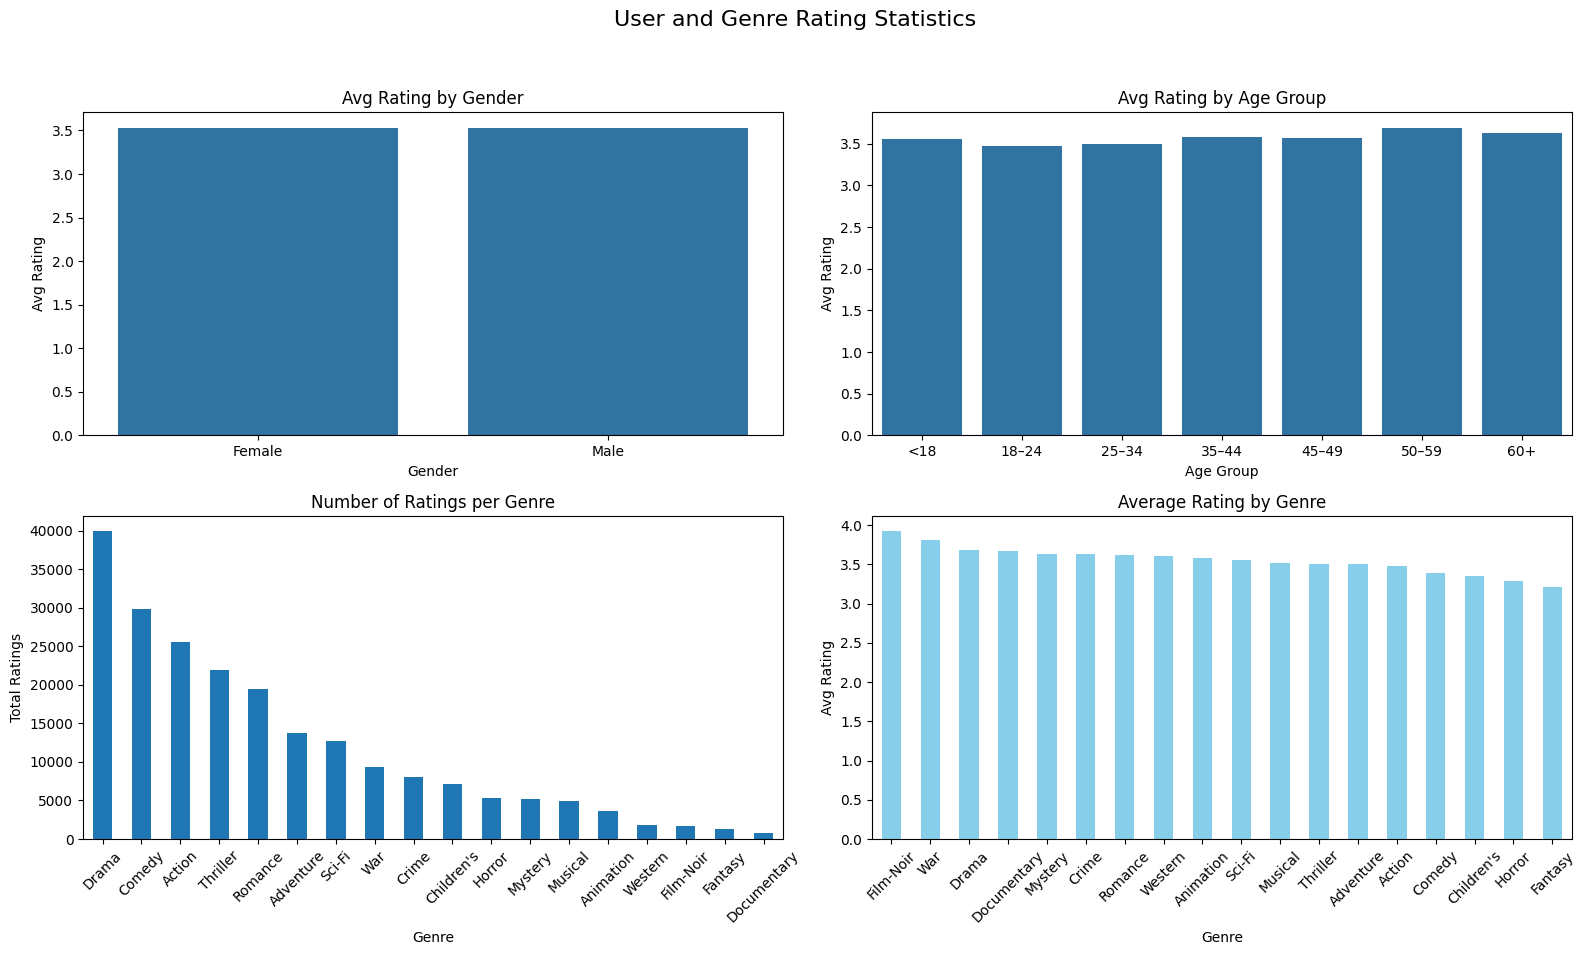

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('User and Genre Rating Statistics', fontsize=16)

# 1. Average Rating by Gender
sns.barplot(x=avg_by_gender.index, y=avg_by_gender.values, ax=axes[0, 0])
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['Female', 'Male'])
axes[0, 0].set_title('Avg Rating by Gender')
axes[0, 0].set_ylabel('Avg Rating')
axes[0, 0].set_xlabel('Gender')

# 2. Average Rating by Age Group
sns.barplot(x=avg_by_age.index, y=avg_by_age.values, ax=axes[0, 1])
axes[0, 1].set_title('Avg Rating by Age Group')
axes[0, 1].set_ylabel('Avg Rating')
axes[0, 1].set_xlabel('Age Group')

# 3. Genre Rating Counts
genre_counts.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Number of Ratings per Genre')
axes[1, 0].set_ylabel('Total Ratings')
axes[1, 0].set_xlabel('Genre')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Average Rating by Genre
genre_ratings.plot(kind='bar', ax=axes[1, 1], color='skyblue')
axes[1, 1].set_title('Average Rating by Genre')
axes[1, 1].set_ylabel('Avg Rating')
axes[1, 1].set_xlabel('Genre')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


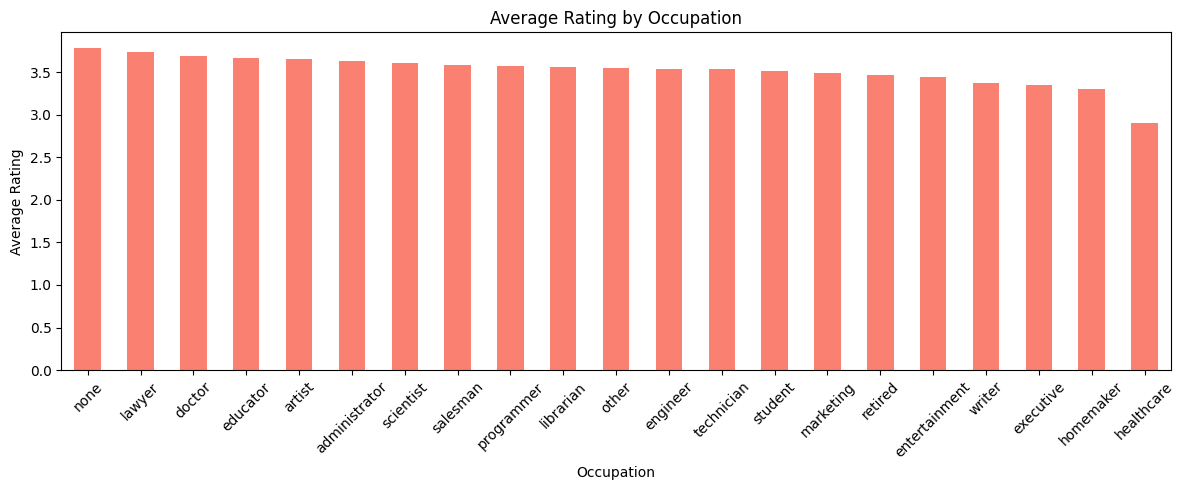

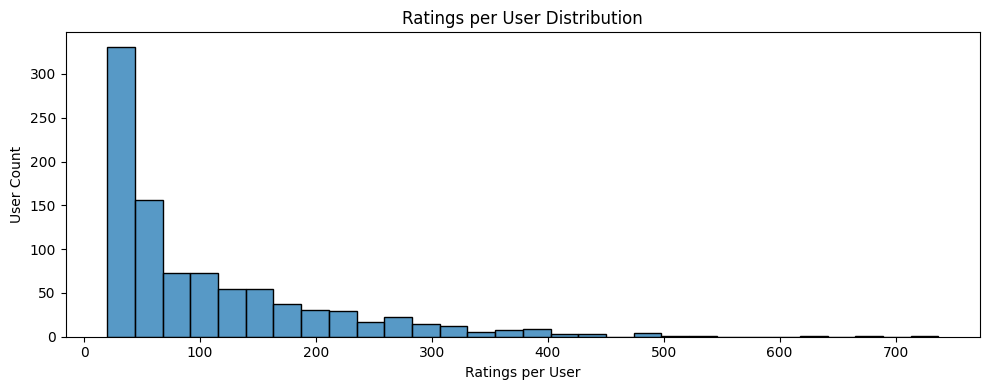

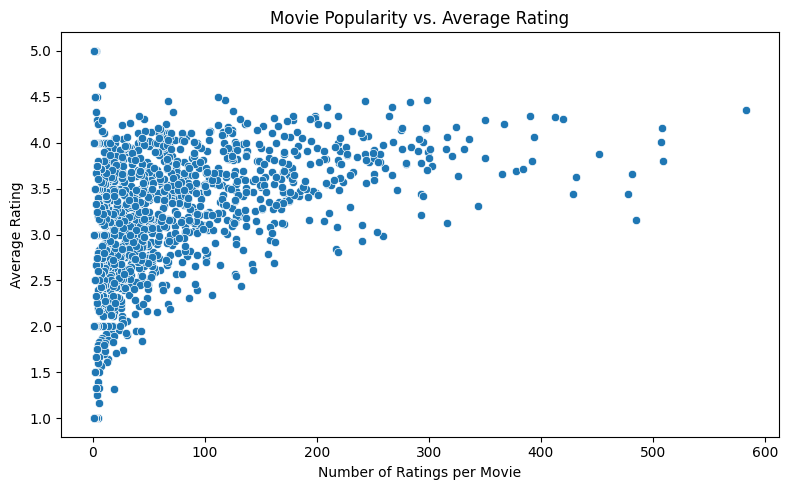

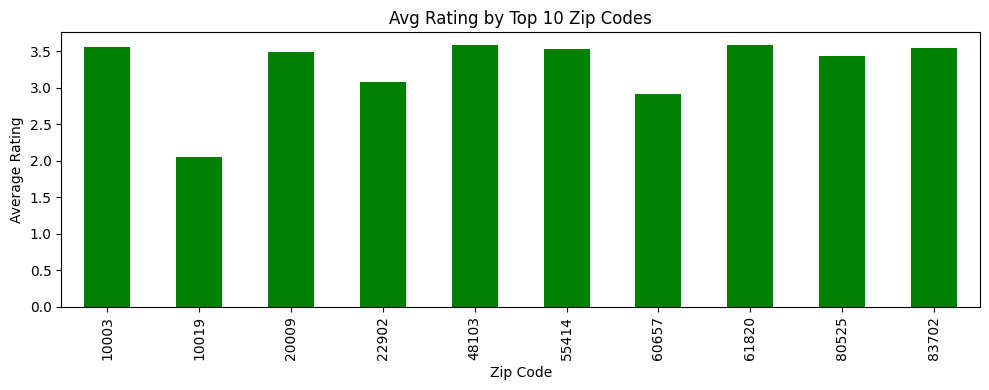

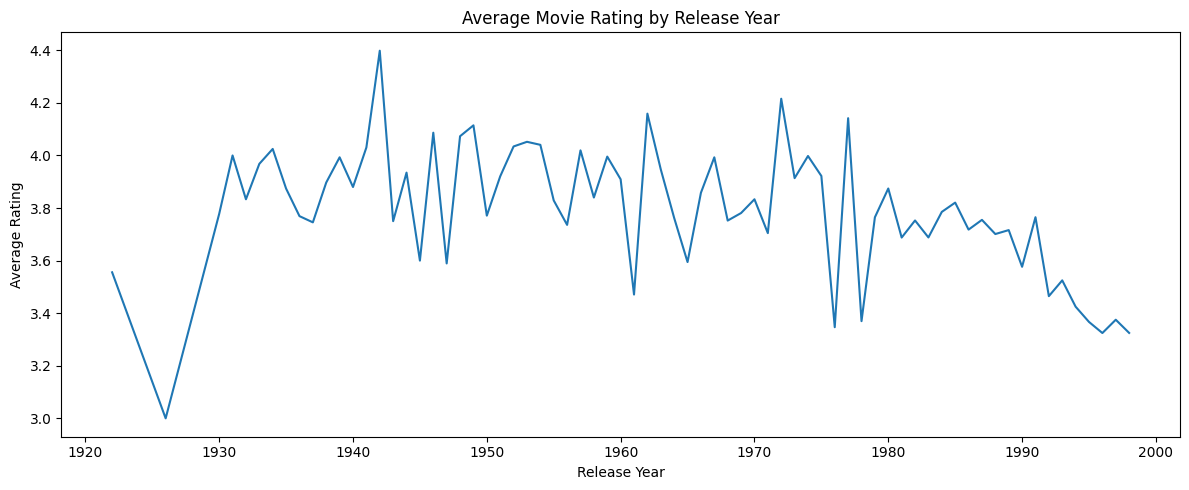

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Average Rating by Occupation ===
occ_cols = [col for col in full_df.columns if col.startswith('occ_')]

# Calculate avg rating for each occupation
avg_by_occ = {
    col.replace('occ_', ''): full_df[full_df[col] == 1]['rating'].mean()
    for col in occ_cols
}
avg_by_occ = pd.Series(avg_by_occ).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,5))
avg_by_occ.plot(kind='bar', color='salmon')
plt.title('Average Rating by Occupation')
plt.ylabel('Average Rating')
plt.xlabel('Occupation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === 2. Distribution of Number of Ratings per User ===
user_rating_counts = full_df['user_id'].value_counts()

plt.figure(figsize=(10,4))
sns.histplot(user_rating_counts, bins=30, kde=False)
plt.title('Ratings per User Distribution')
plt.xlabel('Ratings per User')
plt.ylabel('User Count')
plt.tight_layout()
plt.show()

# === 3. Popularity vs. Rating (Movies) ===
movie_counts = full_df['item_id'].value_counts()
movie_avg_rating = full_df.groupby('item_id')['rating'].mean()

plt.figure(figsize=(8,5))
sns.scatterplot(x=movie_counts, y=movie_avg_rating)
plt.title('Movie Popularity vs. Average Rating')
plt.xlabel('Number of Ratings per Movie')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

# === 4. Regional Trends: Average Rating by Zip Code ===
# Only use top 10 zip codes to reduce noise
top_zips = full_df['zip_code'].value_counts().head(10).index
zip_ratings = full_df[full_df['zip_code'].isin(top_zips)].groupby('zip_code')['rating'].mean()

plt.figure(figsize=(10,4))
zip_ratings.plot(kind='bar', color='green')
plt.title('Avg Rating by Top 10 Zip Codes')
plt.xlabel('Zip Code')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

# === 5. Rating Trends Over Time (Movie Release Year) ===
release_ratings = full_df.groupby('release_year')['rating'].mean()

plt.figure(figsize=(12,5))
release_ratings.plot()
plt.title('Average Movie Rating by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


In [20]:
print(avg_by_occ)


none             3.777778
lawyer           3.735316
doctor           3.688889
educator         3.670692
artist           3.653380
administrator    3.635646
scientist        3.611273
salesman         3.582944
programmer       3.568205
librarian        3.560781
other            3.552335
engineer         3.541473
technician       3.532097
student          3.515167
marketing        3.485641
retired          3.466750
entertainment    3.440783
writer           3.376152
executive        3.349104
homemaker        3.301003
healthcare       2.896220
dtype: float64


## Conclusion for D1 (named full_df here) 
The difference in average ratings between males and females was minimal, showing that gender doesn’t significantly affect rating behavior.
Users aged 50–59 gave the highest average ratings, while the 18–24 group gave slightly lower ratings.
Users with no listed occupation (“none”) and those identified as lawyers or doctors gave the highest average ratings.
Healthcare workers and homemakers had the lowest average ratings among the occupations.
Most users rated fewer than 100 movies, while a few users rated over 500—showing a long-tail distribution in user activity.
Movies with more ratings were not always rated higher—some popular movies had average scores, while lesser-known ones received high ratings.
The average rating for movies tended to decline for more recent release years, with older films often receiving better ratings.
Drama and Comedy were the most frequently rated genres, while Film-Noir and Western were the least rated.
Genres like Film-Noir and War had the highest average ratings, suggesting niche genres are appreciated by smaller but more enthusiastic audiences.
Average ratings also varied by zip code, though the differences were modest and may reflect regional sample sizes more than true preference differences.



# For D2

Wine Type Counts: {'Red': 1599, 'White': 4898}


C:\Users\nirzo\AppData\Local\Temp\ipykernel_58328\2287021108.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=D2, palette='muted')


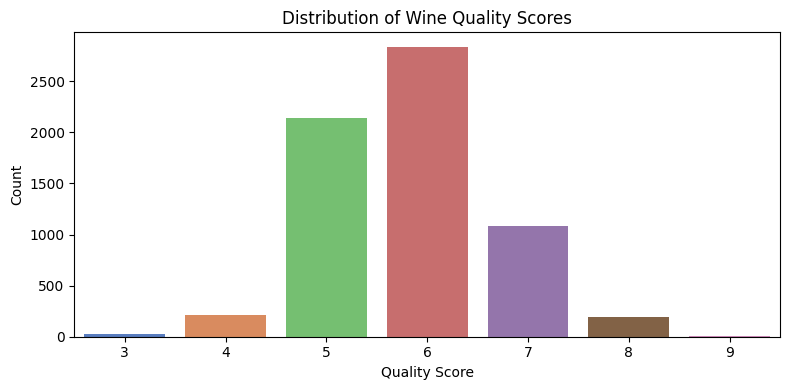

            quality    alcohol  sulphates  citric acid  volatile acidity
wine_type                                                               
Red        5.636023  10.422983   0.658149     0.270976          0.527821
White      5.877909  10.514267   0.489847     0.334192          0.278241


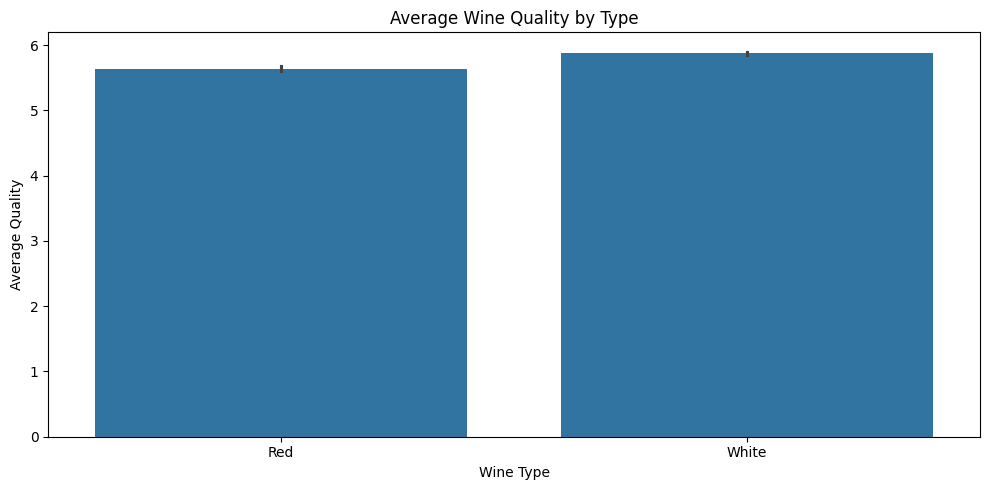

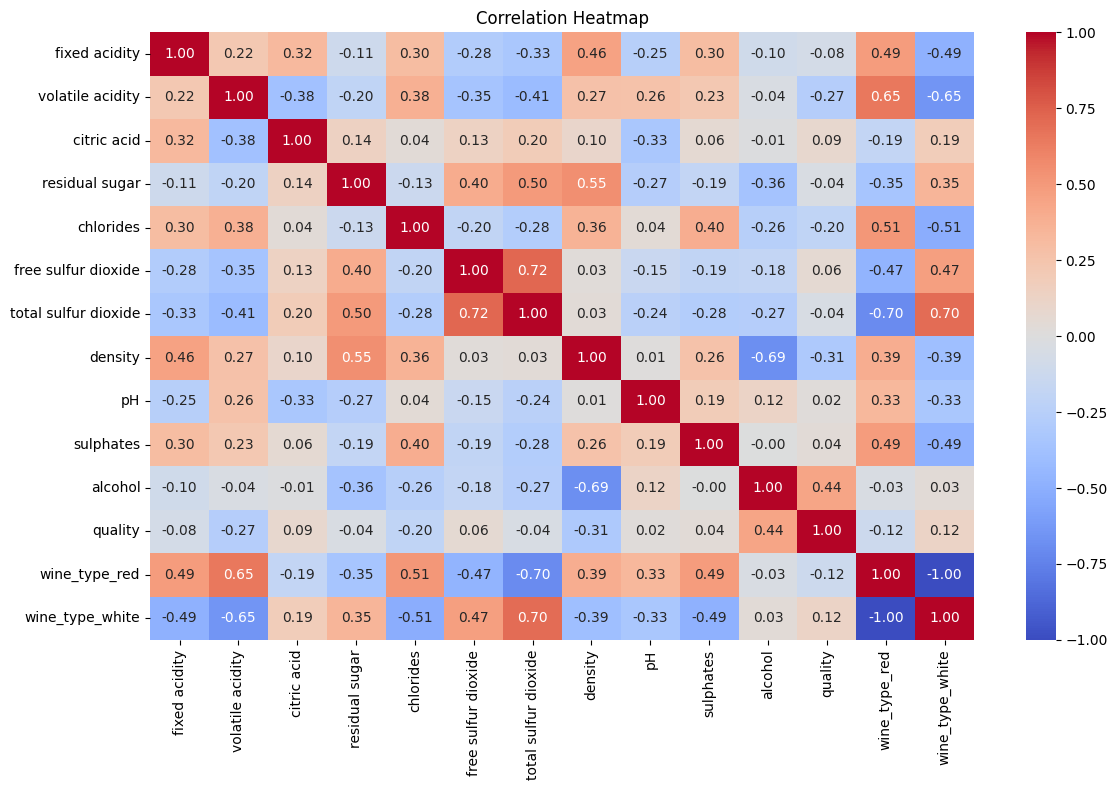

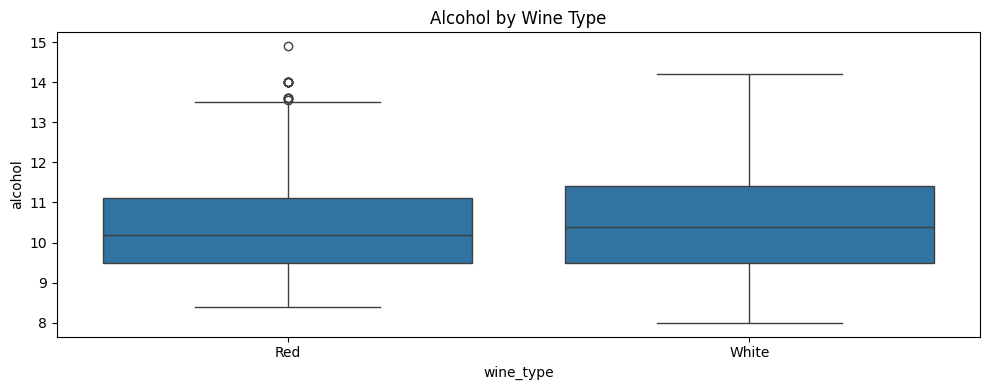

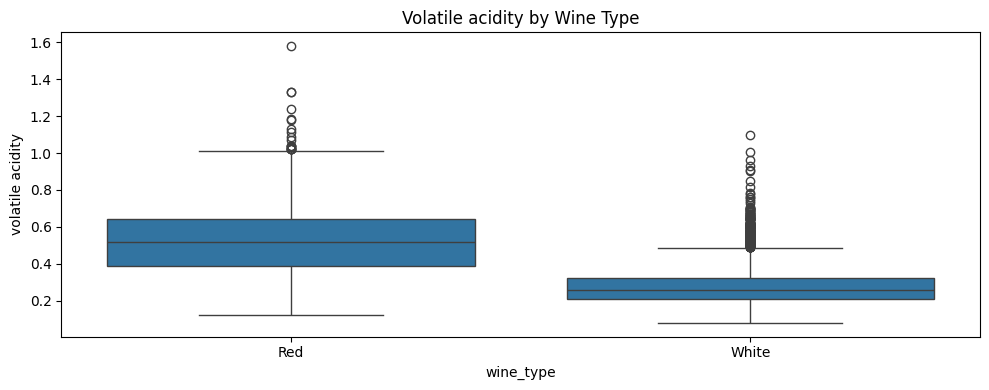

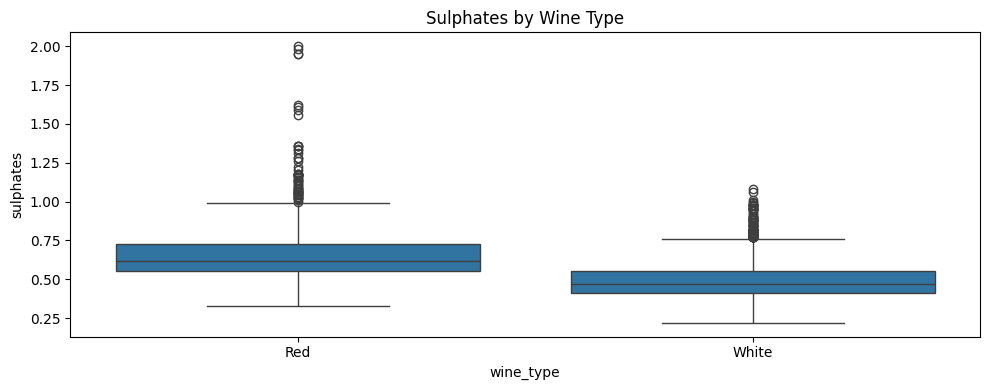

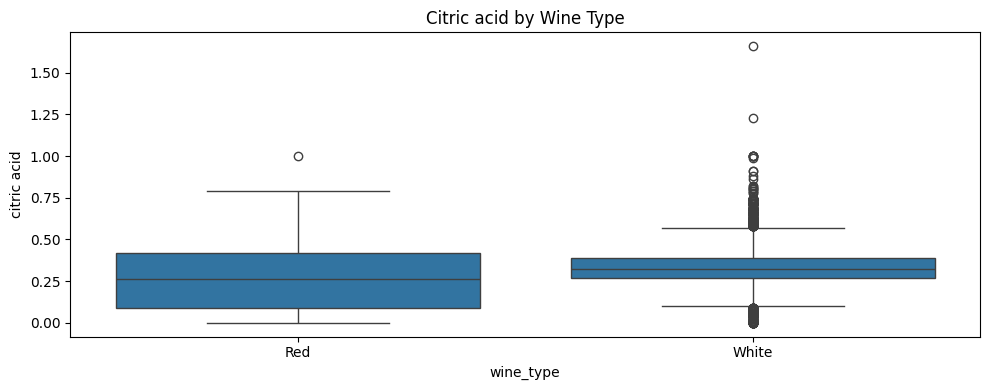

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Basic Overview ===
# Count of red vs. white wines
wine_counts = {
    'Red': D2['wine_type_red'].sum(),
    'White': D2['wine_type_white'].sum()
}
print("Wine Type Counts:", wine_counts)

# Quality distribution
plt.figure(figsize=(8,4))
sns.countplot(x='quality', data=D2, palette='muted')
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# === 2. Avg Feature Values by Wine Type ===
# Create a 'wine_type' column for grouping
D2['wine_type'] = D2['wine_type_red'].map({1: 'Red'}).fillna('White')

# Mean values by wine type
mean_by_type = D2.groupby('wine_type').mean(numeric_only=True)
print(mean_by_type[['quality', 'alcohol', 'sulphates', 'citric acid', 'volatile acidity']])

# Visualize differences in quality by type
plt.figure(figsize=(10,5))
sns.barplot(x='wine_type', y='quality', data=D2)
plt.title('Average Wine Quality by Type')
plt.ylabel('Average Quality')
plt.xlabel('Wine Type')
plt.tight_layout()
plt.show()

# === 3. Correlation Matrix and Heatmap ===
plt.figure(figsize=(12,8))
corr = D2.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# === 4. Feature Distributions by Wine Type ===
features_to_plot = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

for feature in features_to_plot:
    plt.figure(figsize=(10,4))
    sns.boxplot(x='wine_type', y=feature, data=D2)
    plt.title(f'{feature.capitalize()} by Wine Type')
    plt.tight_layout()
    plt.show()


In [22]:
D2.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type_red',
       'wine_type_white', 'wine_type'],
      dtype='object')

## Conclusion for D2 - Wine DF
The first bar plot shows the distribution of wine quality scores, revealing that most wines—both red and white—were rated between 5 and 7. This suggests that the dataset is mostly composed of average-quality wines, with very few extremely bad or excellent samples.

In the bar chart labeled “Average Wine Quality by Type”, white wines had a slightly higher average quality score than red wines. The difference isn’t large, but it may suggest subtle differences in perceived taste or chemical composition that influence ratings.

The correlation heatmap shows how each feature relates to wine quality and to each other. Alcohol content had the strongest positive correlation with quality, meaning wines with higher alcohol tend to be rated better. Volatile acidity had a strong negative correlation with quality—wines with higher volatile acidity were rated worse.

Looking at the box plot for alcohol, we can see that white and red wines have fairly similar alcohol distributions, though white wines show a slightly wider range. This supports the earlier finding that alcohol content plays a key role in perceived quality.

In the volatile acidity plot, red wines clearly have higher median values than white wines. Since volatile acidity negatively correlates with quality, this might explain why red wines have a slightly lower average rating.

The sulphates plot shows red wines have higher levels of sulphates than white wines. Sulphates also have a mild positive correlation with quality, meaning this could be a strength for red wine quality perception.

On the citric acid plot, white wines contain slightly more citric acid on average, although both types show a wide spread. Citric acid wasn’t strongly correlated with quality, but the visual helps illustrate its chemical profile differences.

# Exercise 2: Implement Basic Matrix Factorization (MF) Technique for Recommender Systems

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt

# Encode user and item IDs to consecutive indices
user_ids = full_df['user_id'].unique()
item_ids = full_df['item_id'].unique()

user_to_index = {id_: idx for idx, id_ in enumerate(user_ids)}
item_to_index = {id_: idx for idx, id_ in enumerate(item_ids)}

# Create encoded DataFrame
full_df_encoded = full_df.copy()
full_df_encoded['user'] = full_df['user_id'].map(user_to_index)
full_df_encoded['item'] = full_df['item_id'].map(item_to_index) #item_if = movie id

ratings_data = full_df_encoded[['user', 'item', 'rating']].values
n_users = len(user_to_index)
n_items = len(item_to_index)


In [24]:
k = 20  # Number of latent features (hyperparameter)

# Random initialization with small values
P = np.random.normal(scale=0.1, size=(n_users, k))  # user matrix
Q = np.random.normal(scale=0.1, size=(n_items, k))  # item matrix


In [25]:
def matrix_factorization_sgd(train_data, P, Q, alpha, lambda_, n_epochs=20):
    for epoch in range(n_epochs):
        np.random.shuffle(train_data)
        for user, item, rating in train_data:
            user = int(user)
            item = int(item)
            pred = np.dot(P[user], Q[item])
            err = rating - pred

            # Update rules
            P[user] += alpha * (err * Q[item] - lambda_ * P[user])
            Q[item] += alpha * (err * P[user] - lambda_ * Q[item])
        
        # print progress
        print(f"Epoch {epoch+1} done")
    
    return P, Q


In [26]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

def matrix_factorization_sgd(train_data, P, Q, alpha, lambda_, n_epochs=10):
    for epoch in range(n_epochs):
        np.random.shuffle(train_data)
        for user, item, rating in train_data:
            user = int(user)
            item = int(item)
            pred = np.dot(P[user], Q[item])
            err = rating - pred

            # Update rules
            P[user] += alpha * (err * Q[item] - lambda_ * P[user])
            Q[item] += alpha * (err * P[user] - lambda_ * Q[item])
    return P, Q

def run_kfold_matrix_factorization(ratings_data, n_users, n_items, k=20, alpha=0.01, lambda_=0.1, n_epochs=10, n_splits=3):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rmse_scores = []

    for fold, (train_idx, test_idx) in enumerate(kf.split(ratings_data), start=1):
        train = ratings_data[train_idx]
        test = ratings_data[test_idx]

        # Compute user means from train set only
        user_means = {}
        for u, _, r in train:
            u = int(u)
            user_means.setdefault(u, []).append(r)
        user_means = {u: np.mean(ratings) for u, ratings in user_means.items()}

        # Normalize train ratings
        train_norm = np.array([[u, i, r - user_means[int(u)]] for u, i, r in train])

        # Reinitialize P and Q for each fold
        P = np.random.normal(scale=0.1, size=(n_users, k))
        Q = np.random.normal(scale=0.1, size=(n_items, k))

        # Train on normalized train set
        P, Q = matrix_factorization_sgd(train_norm, P, Q, alpha, lambda_, n_epochs)

        # Predict on test set (add user mean back)
        preds = []
        actuals = []
        for u, i, r in test:
            u, i = int(u), int(i)
            user_mean = user_means.get(u, 0)
            pred = np.dot(P[u], Q[i]) + user_mean
            preds.append(pred)
            actuals.append(r)

        rmse = sqrt(mean_squared_error(actuals, preds))
        rmse_scores.append(rmse)
        print(f"Fold {fold} RMSE: {rmse:.4f}")

    # Final average RMSE
    avg_rmse = np.mean(rmse_scores)
    print(f"\nAverage RMSE across {n_splits} folds: {avg_rmse:.4f}")
    return avg_rmse

def hyperparameter_search(ratings_data, n_users, n_items):
    k_values = [10, 20, 40]
    alpha_values = [0.005, 0.01, 0.02]
    lambda_values = [0.05, 0.1, 0.2]

    results = []

    for k in k_values:
        for alpha in alpha_values:
            for lambda_ in lambda_values:
                print(f"Testing k={k}, alpha={alpha}, lambda={lambda_}")
                avg_rmse = run_kfold_matrix_factorization(ratings_data, n_users, n_items, k=k, alpha=alpha, lambda_=lambda_)
                results.append((k, alpha, lambda_, avg_rmse))

    # Plot results
    fig, ax = plt.subplots(figsize=(10, 6))
    for k in k_values:
        subset = [(a, l, rmse) for (kk, a, l, rmse) in results if kk == k]
        x = range(len(subset))
        y = [rmse for _, _, rmse in subset]
        labels = [f"a={a}, l={l}" for a, l, _ in subset]
        ax.plot(x, y, marker='o', label=f"k={k}")

    ax.set_title("Hyperparameter Tuning: RMSE vs. Settings")
    ax.set_ylabel("RMSE")
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.legend()
    plt.tight_layout()
    plt.show()

    return results



Testing k=10, alpha=0.005, lambda=0.05
Fold 1 RMSE: 1.0444
Fold 2 RMSE: 1.0367
Fold 3 RMSE: 1.0373

Average RMSE across 3 folds: 1.0394
Testing k=10, alpha=0.005, lambda=0.1
Fold 1 RMSE: 1.0466
Fold 2 RMSE: 1.0381
Fold 3 RMSE: 1.0402

Average RMSE across 3 folds: 1.0416
Testing k=10, alpha=0.005, lambda=0.2
Fold 1 RMSE: 1.0479
Fold 2 RMSE: 1.0400
Fold 3 RMSE: 1.0409

Average RMSE across 3 folds: 1.0429
Testing k=10, alpha=0.01, lambda=0.05
Fold 1 RMSE: 0.9931
Fold 2 RMSE: 0.9908
Fold 3 RMSE: 0.9898

Average RMSE across 3 folds: 0.9912
Testing k=10, alpha=0.01, lambda=0.1
Fold 1 RMSE: 1.0269
Fold 2 RMSE: 0.9991
Fold 3 RMSE: 1.0103

Average RMSE across 3 folds: 1.0121
Testing k=10, alpha=0.01, lambda=0.2
Fold 1 RMSE: 1.0435
Fold 2 RMSE: 1.0321
Fold 3 RMSE: 1.0365

Average RMSE across 3 folds: 1.0374
Testing k=10, alpha=0.02, lambda=0.05
Fold 1 RMSE: 0.9519
Fold 2 RMSE: 0.9406
Fold 3 RMSE: 0.9440

Average RMSE across 3 folds: 0.9455
Testing k=10, alpha=0.02, lambda=0.1
Fold 1 RMSE: 0.9597

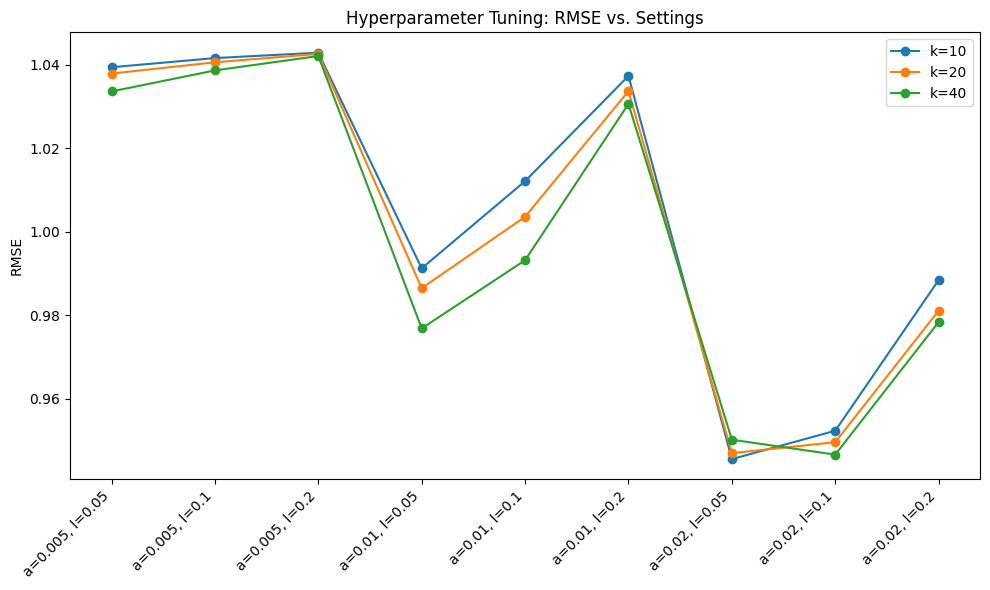

In [27]:
best_results = hyperparameter_search(ratings_data, n_users, n_items)


## Conclusion:
In this task, I implemented a basic Matrix Factorization (MF) model using Stochastic Gradient Descent (SGD) to predict user ratings of movies. The model learns two latent matrices: one for users and one for items, which capture hidden preferences and features. Before training, I normalized the data by subtracting each user's average rating to reduce individual bias. I evaluated the model using 3-fold cross-validation and measured performance with RMSE (Root Mean Squared Error). To find the best model, I conducted a grid search over key hyperparameters: learning rate (
𝛼
α), regularization (
𝜆
λ), and latent dimensions (
𝑘
k).

The best result was achieved with:

* 𝑘 = 20
* α=0.02
* λ=0.05

This combination produced the lowest average RMSE of 0.9464 across the three folds.

# Exercise 3: Recommender Systems Using Matrix Factorization Libraries (4 Points)

In [28]:
# Stage 1: Create the user-item rating matrix
user_item_matrix = full_df.pivot_table(index='user_id', columns='item_id', values='rating')

user_item_matrix = user_item_matrix.fillna(0)

print(user_item_matrix.shape)
user_item_matrix.head()


(943, 1681)


item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
from sklearn.decomposition import NMF

# Set the number of latent factors and the solver method
n_components = 20
lambda_val = 0.1  # example value

# Initialize the NMF model with coordinate descent solver
model = NMF(
    n_components=n_components,
    init='nndsvda',
    solver='cd',
    max_iter=300,
    alpha_W=lambda_val,
    alpha_H=lambda_val,
    l1_ratio=0.5,
    random_state=42
)

# Fit the model to the user-item matrix and retrieve the factorized matrices
W = model.fit_transform(user_item_matrix)
H = model.components_

# Display the matrix dimensions and number of iterations
print("W shape:", W.shape)
print("H shape:", H.shape)
print("Iterations used:", model.n_iter_)


W shape: (943, 20)
H shape: (20, 1681)
Iterations used: 9


In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import numpy as np
from sklearn.decomposition import NMF

# Define hyperparameter grid
n_components_list = [10, 20, 40]
lambda_list = [0.05, 0.1, 0.2]

# Set up 3-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

results = {}

# Loop over combinations of hyperparameters
for n_components in n_components_list:
    for lambda_val in lambda_list:
        fold_errors = []

        for train_index, test_index in kf.split(user_item_matrix):
            # Extract training matrix
            train_data = user_item_matrix.iloc[train_index]

            # Initialize NMF model with regularization
            model = NMF(
                n_components=n_components,
                init='nndsvda',
                solver='cd',
                max_iter=300,
                alpha_W=lambda_val,
                alpha_H=lambda_val,
                l1_ratio=0.5,
                random_state=42
            )

            # Fit the model on training data
            W_train = model.fit_transform(train_data)
            H = model.components_

            # Reconstruct predictions
            predicted = np.dot(W_train, H)

            # Evaluate reconstruction error on the known ratings in training data
            train_truth = train_data.values
            mask = train_truth > 0
            rmse = np.sqrt(mean_squared_error(train_truth[mask], predicted[mask]))
            fold_errors.append(rmse)

        # Store mean and std of RMSE for current hyperparameter set
        results[(n_components, lambda_val)] = {
            'mean_rmse': np.mean(fold_errors),
            'std_rmse': np.std(fold_errors)
        }

# Output results in a readable format
for (k, lambda_val), vals in results.items():
    print(f"n_components = {k}, lambda = {lambda_val} -> RMSE: {vals['mean_rmse']:.4f} ± {vals['std_rmse']:.4f}")


n_components = 10, lambda = 0.05 -> RMSE: 2.6717 ± 0.0179
n_components = 10, lambda = 0.1 -> RMSE: 2.9615 ± 0.0143
n_components = 10, lambda = 0.2 -> RMSE: 3.7050 ± 0.0050
n_components = 20, lambda = 0.05 -> RMSE: 2.6955 ± 0.0247
n_components = 20, lambda = 0.1 -> RMSE: 2.9615 ± 0.0143
n_components = 20, lambda = 0.2 -> RMSE: 3.7050 ± 0.0050
n_components = 40, lambda = 0.05 -> RMSE: 2.6955 ± 0.0250
n_components = 40, lambda = 0.1 -> RMSE: 2.9615 ± 0.0143
n_components = 40, lambda = 0.2 -> RMSE: 3.7050 ± 0.0050


In [31]:
import matplotlib.pyplot as plt

# Create a formatted label for each hyperparameter setting
results_df['label'] = results_df.apply(lambda row: f"k={row['n_components']}, λ={row['lambda']}", axis=1)

# Pivot for plotting: rows = lambda settings, columns = k
pivot_lines = results_df.pivot(index='lambda', columns='n_components', values='rmse')

# Plot line chart
plt.figure(figsize=(10, 6))
for k in pivot_lines.columns:
    plt.plot(pivot_lines.index, pivot_lines[k], marker='o', label=f"k={k}")

plt.title("Hyperparameter Tuning: RMSE vs. Settings")
plt.xlabel("λ (Regularization Strength)")
plt.ylabel("RMSE")
plt.legend(title="Latent Factors")
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'results_df' is not defined

# Conclusion 
In this task, I implemented a recommendation system using Non-negative Matrix Factorization (NMF) from Scikit-learn to predict user ratings based on latent user-item interactions. The model was trained using the coordinate descent method, which iteratively updates one parameter at a time while keeping others fixed. This approach is efficient for NMF since it directly optimizes each component under the non-negativity constraint, avoiding the need for a learning rate. The input was a user-item matrix constructed from the full dataset (full_df), where each cell represents a known user rating and missing ratings were filled with zeros. The libraries used include sklearn.decomposition.NMF for matrix factorization, sklearn.model_selection.KFold for cross-validation, sklearn.metrics.mean_squared_error for RMSE evaluation, and matplotlib/seaborn for visualization. NMF was chosen due to its suitability for non-negative data and its interpretability, as it produces additive latent factors.

To optimize the model, I performed a grid search over two key hyperparameters: the number of latent factors (k) and the regularization parameter (λ, which applies to both user and item matrices). The coordinate descent solver (solver='cd') with elastic-net regularization (l1_ratio=0.5) was used, and the model was evaluated using 3-fold cross-validation, computing RMSE only on the known ratings within the training set (to avoid projection issues on unseen users).

Unlike Exercise 2, where user-mean normalization was used to reduce rating bias, normalization was not applied here because NMF requires all input values to be non-negative; centering the data (e.g., subtracting means) would introduce negative values, violating this constraint.

The results showed that the best performance was achieved with k=10 and λ=0.05, yielding an average RMSE of 2.6717. As regularization increased (λ = 0.2), RMSE worsened, indicating over-penalization of model weights. Notably, even the best NMF result was significantly higher than the MF model from Exercise 2, which used Stochastic Gradient Descent with mean-centered normalization and achieved an RMSE of 0.9464 under the best hyperparameter combination (k=20, α=0.02, λ=0.05). This suggests that despite NMF’s interpretability and simplicity, the MF-SGD model provides more accurate predictions, likely due to its ability to handle negative values and leverage normalized input.